In [97]:
from mwrogue.esports_client import EsportsClient
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
def get_scoreboard_players_in_tournament(tournament):
    site = EsportsClient("lol")
    response = site.cargo_client.query(
        tables="ScoreboardGames=SG, ScoreboardPlayers=SP, Tournaments=T",
        join_on="SG.GameId=SP.GameId, SG.OverviewPage=T.OverviewPage",
        fields="SP.Name, SP.Champion, SP.Kills, SP.Deaths, SP.Assists, SP.Gold, SP.CS, SP.DamageToChampions, SP.VisionScore, SP.PlayerWin, SP.Role",
        where=f"T.Name = '{tournament}'"
    )
    return pd.DataFrame(response)

In [101]:
def get_players_images():
    site = EsportsClient("lol")
    response = site.cargo_client.query(
        tables="PlayerImages=PI",
        fields="PI.FileName, PI.Link, PI.Team, PI.Tournament, ImageType, PI.Caption, PI.IsProfileImage, PI.SortDate"
    )
    return pd.DataFrame(response)

In [167]:
players_images = get_players_images()

In [170]:
players_images["FileName"] = players_images["FileName"].str.replace(" ", "_")

In [ ]:
players_images["image_url"] = players_images.apply(
    lambda row: f"https://lol.fandom.com/wiki/{row['Link']}?file={row['FileName']}",
    axis=1
)

0       https://lol.fandom.com/wiki/0kay?file=0kay.jpg
1    https://lol.fandom.com/wiki/Abbedagge?file=100...
2    https://lol.fandom.com/wiki/Abbedagge?file=100...
3    https://lol.fandom.com/wiki/Abbedagge?file=100...
4    https://lol.fandom.com/wiki/Abbedagge?file=100...
Name: image_url, dtype: object


In [65]:
df_sbp_LEC_2025_spring = get_scoreboard_players_in_tournament("LEC 2025 Spring")

In [79]:
df_sbp_LEC_2025_spring

,Name,Champion,Kills,Deaths,Assists,Gold,CS,DamageToChampions,VisionScore,PlayerWin,Role
0,113,Lillia,0,5,5,10173,218,14530,36,False,Jungle
1,113,Maokai,1,1,4,11580,221,18763,50,False,Jungle
2,113,Maokai,1,3,16,9311,138,10323,35,True,Jungle
3,113,Maokai,2,2,9,12829,234,25040,57,True,Jungle
4,113,Nidalee,4,3,6,13589,231,15628,56,False,Jungle
...,...,...,...,...,...,...,...,...,...,...,...
1055,Yike,Vi,3,5,3,11049,195,11171,47,False,Jungle
1056,Yike,Vi,4,0,11,11648,180,11249,47,True,Jungle
1057,Yike,Vi,6,3,10,12542,214,12625,57,True,Jungle
1058,Yike,Xin Zhao,3,1,4,11660,218,9939,46,True,Jungle


In [71]:
df_sbp_LEC_2025_spring["Kills"] = pd.to_numeric(df_sbp_LEC_2025_spring["Kills"], errors="coerce")

In [72]:
df_sbp_LEC_2025_spring["Deaths"] = pd.to_numeric(df_sbp_LEC_2025_spring["Deaths"], errors="coerce")

In [73]:
df_sbp_LEC_2025_spring["Assists"] = pd.to_numeric(df_sbp_LEC_2025_spring["Assists"], errors="coerce")

In [74]:
df_sbp_LEC_2025_spring["Gold"] = pd.to_numeric(df_sbp_LEC_2025_spring["Gold"], errors="coerce")

In [75]:
df_sbp_LEC_2025_spring["CS"] = pd.to_numeric(df_sbp_LEC_2025_spring["CS"], errors="coerce")

In [76]:
df_sbp_LEC_2025_spring["DamageToChampions"] = pd.to_numeric(df_sbp_LEC_2025_spring["DamageToChampions"], errors="coerce")

In [77]:
df_sbp_LEC_2025_spring["VisionScore"] = pd.to_numeric(df_sbp_LEC_2025_spring["VisionScore"], errors="coerce")

In [78]:
df_sbp_LEC_2025_spring['PlayerWin'] = df_sbp_LEC_2025_spring['PlayerWin'].map({'Yes': True, 'No': False})

In [80]:
df_support_LEC = df_sbp_LEC_2025_spring[df_sbp_LEC_2025_spring['Role'] == 'Support']

In [81]:
df_support_LEC

,Name,Champion,Kills,Deaths,Assists,Gold,CS,DamageToChampions,VisionScore,PlayerWin,Role
41,Alvaro,Alistar,0,5,2,6077,33,3447,113,False,Support
42,Alvaro,Alistar,1,1,13,9012,47,3543,138,True,Support
43,Alvaro,Alistar,1,2,15,7779,30,5051,100,True,Support
44,Alvaro,Alistar,1,5,7,7028,25,3458,112,False,Support
45,Alvaro,Braum,0,2,1,6027,25,3902,98,False,Support
...,...,...,...,...,...,...,...,...,...,...,...
984,Targamas,Rakan,0,1,15,7633,30,5452,100,True,Support
985,Targamas,Rakan,0,3,9,8146,42,3322,117,True,Support
986,Targamas,Rell,0,8,1,8718,49,4096,169,False,Support
987,Targamas,Rell,1,7,11,9594,40,7733,166,False,Support


In [86]:
vision_score_support = df_support_LEC.groupby("Name")["VisionScore"].mean().reset_index()

In [87]:
vision_score_support

,Name,VisionScore
0,Alvaro,128.863636
1,Execute,127.888889
2,Jun,127.619048
3,Labrov,117.590909
4,Loopy,110.263158
5,Malrang,124.000000
6,Mikyx,129.809524
7,Nisqy,120.047619
8,Parus,138.142857
9,Stend,129.238095


In [88]:
# create a df with the win % for each player in df_support_LEC
win_rate_support = df_support_LEC.groupby("Name")["PlayerWin"].mean().reset_index()

In [89]:
win_rate_support

,Name,PlayerWin
0,Alvaro,0.636364
1,Execute,0.277778
2,Jun,0.476190
3,Labrov,0.590909
4,Loopy,0.263158
5,Malrang,0.000000
6,Mikyx,0.714286
7,Nisqy,0.428571
8,Parus,0.380952
9,Stend,0.476190


In [92]:
# concatenate the two dataframes on the Name column
vision_score_support = vision_score_support.rename(columns={"VisionScore": "AvgVisionScore"})
win_rate_support = win_rate_support.rename(columns={"PlayerWin": "WinRate"})

In [94]:
vs_score_winrate_support = pd.merge(vision_score_support, win_rate_support, on="Name")

In [95]:
vs_score_winrate_support

,Name,AvgVisionScore,WinRate
0,Alvaro,128.863636,0.636364
1,Execute,127.888889,0.277778
2,Jun,127.619048,0.476190
3,Labrov,117.590909,0.590909
4,Loopy,110.263158,0.263158
5,Malrang,124.000000,0.000000
6,Mikyx,129.809524,0.714286
7,Nisqy,120.047619,0.428571
8,Parus,138.142857,0.380952
9,Stend,129.238095,0.476190


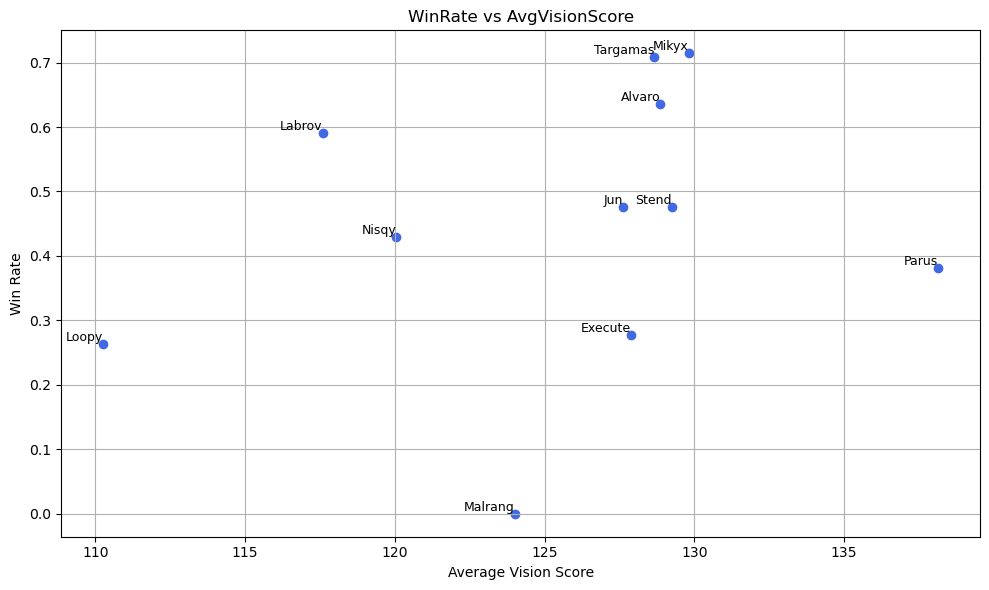

In [99]:
plt.figure(figsize=(10, 6))
plt.scatter(vs_score_winrate_support['AvgVisionScore'], vs_score_winrate_support['WinRate'], color='royalblue')

# Ajouter les noms
for i, row in vs_score_winrate_support.iterrows():
    plt.text(row['AvgVisionScore'], row['WinRate'], row['Name'],
             fontsize=9, ha='right', va='bottom')

# Titres et labels
plt.title("WinRate vs AvgVisionScore")
plt.xlabel("Average Vision Score")
plt.ylabel("Win Rate")
plt.grid(True)
plt.tight_layout()

plt.show()